In [1]:
import simulation
import utils
import HminLower
import HminLowerb
import shannonLower
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import json
import ShannonEAT
import cvxpy as cp
import chaospy
from scipy.special import betaincinv

# Time bin encoding

## Ideal

In [2]:
res = {'shannon': [], 'hmin': [], 'deltas': []}
alphas = np.linspace(0.07, 2.5, 30)

for alpha in alphas:
    delta, p = simulation.getProbas(alpha, 1, 0, '2')
    hmin = HminLowerb.getHmin(p, delta, 1/2)
    shannon = shannonLower.runOpti(delta, p, 1/2)
    res['shannon'].append(shannon)
    res['hmin'].append(hmin)
    res['deltas'].append(delta)

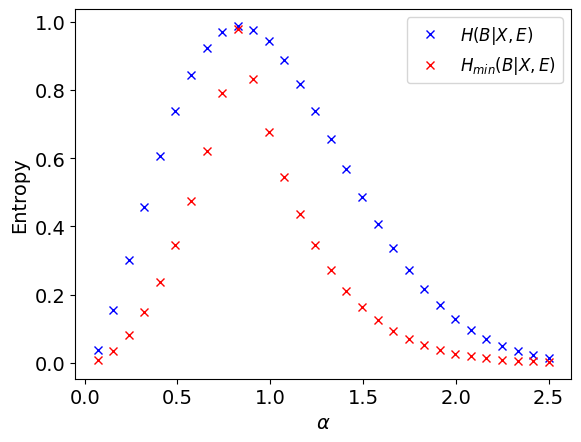

In [3]:
plt.figure()
plt.plot(alphas, res['shannon'], 'bx', label=r'$H(B|X,E)$')
plt.plot(alphas, res['hmin'], 'rx', label=r'$H_{min}(B|X,E)$')
plt.xlabel(r'$\alpha$', fontsize=14)
plt.ylabel(r'Entropy', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)

In [4]:
alphas[res['shannon'].index(max(res['shannon']))]

np.float64(0.8241379310344827)

## Bad detector

In [5]:
res = {'shannon': [], 'hmin': [], 'deltas': []}
alphas = np.linspace(0.07, 2.5, 30)

for alpha in alphas:
    delta, p = simulation.getProbas(alpha, 0.7, 1e-6, '2', True)
    hmin = HminLowerb.getHmin(p, delta, 1/2)
    shannon = shannonLower.runOpti(delta, p, 1/2)
    res['shannon'].append(shannon)
    res['hmin'].append(hmin)
    res['deltas'].append(delta)

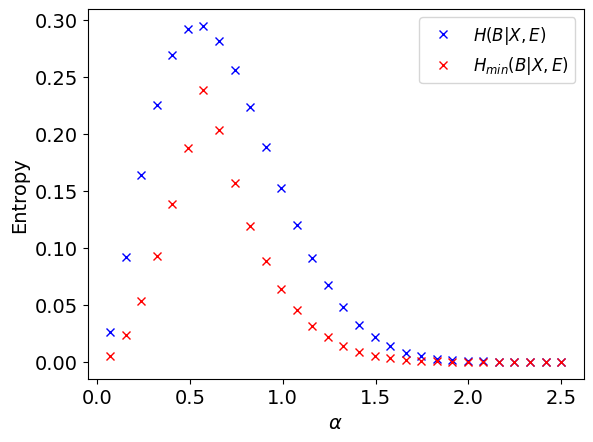

In [6]:
plt.figure()
plt.plot(alphas, res['shannon'], 'bx', label=r'$H(B|X,E)$')
plt.plot(alphas, res['hmin'], 'rx', label=r'$H_{min}(B|X,E)$')
plt.xlabel(r'$\alpha$', fontsize=14)
plt.ylabel(r'Entropy', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)

In [7]:
alphas[res['shannon'].index(max(res['shannon']))]

np.float64(0.5727586206896553)

## Bad Detector and source

In [8]:
res = {'shannon': [], 'hmin': [], 'deltas': []}
alphas = np.linspace(0.07, 2.5, 30)

for alpha in alphas:
    amax, delta, p = simulation.doSimul(alpha, 1/2, '2', 100000, 0.7, True, True)
    hmin = HminLowerb.getHmin(p[0], delta, 1/2)
    shannon = shannonLower.runOpti(delta, p[0], 1/2)
    res['shannon'].append(shannon)
    res['hmin'].append(hmin)
    res['deltas'].append(delta)

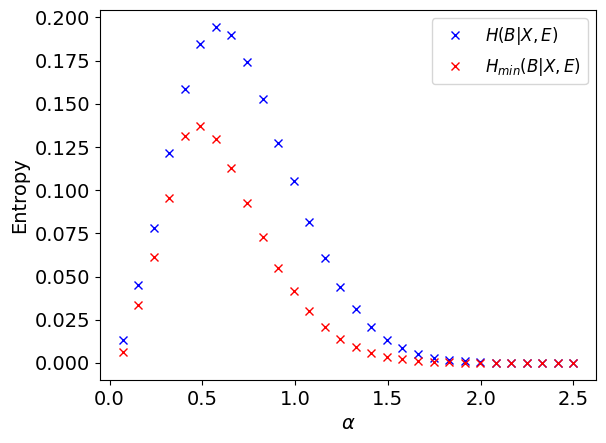

In [9]:
plt.figure()
plt.plot(alphas, res['shannon'], 'bx', label=r'$H(B|X,E)$')
plt.plot(alphas, res['hmin'], 'rx', label=r'$H_{min}(B|X,E)$')
plt.xlabel(r'$\alpha$', fontsize=14)
plt.ylabel(r'Entropy', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)

In [10]:
alphas[res['shannon'].index(max(res['shannon']))]

np.float64(0.5727586206896553)

## Block size study

In [ ]:
alpha = alphas[res['shannon'].index(max(res['shannon']))]
npoints = np.linspace(3, 7, 10)

amax, delta, p = simulation.doSimul(alpha, 1/2, '2', 100000, 0.7, True, True)
H_theo, lambdas, Rs, cm = shannonLower.getHDual(delta, p[0], 1/2)

In [ ]:
vals = []
for npoint in npoints:
    ps = []
    delta = 0.0
    for i in range(5):
        amax, delta, p = simulation.doSimul(alpha, 1/2, '2', int(10**npoint), 0.7, True, True)
        ps.append(p[0])
    val3 = ShannonEAT.getH3(ps, int(10**npoint), lambdas, Rs, cm)
    vals.append(val3)
    

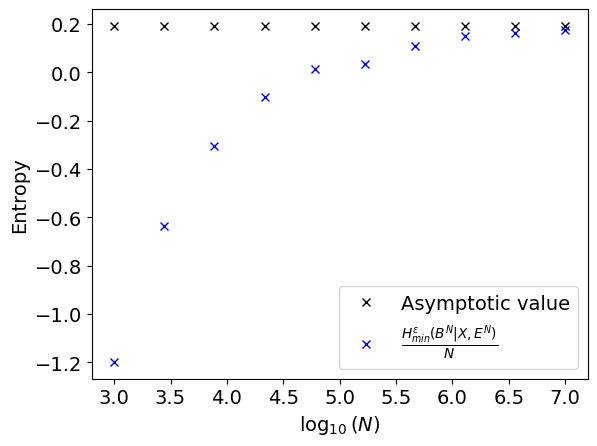

In [13]:
plt.figure()
Hts = [H_theo]*10
plt.plot(npoints, Hts, 'kx', label=r'Asymptotic value')
plt.plot(npoints, vals, 'bx', label=r'$\frac{H_{min}^\epsilon(B^N|X,E^N)}{N}$')
plt.xlabel(r"$\log_{10}(N)$", fontsize=14)
plt.ylabel(r"Entropy", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

## Bad detector, source + finite size

In [19]:
res = {'alpha': [], 'vals': [], }
alphas = np.linspace(0.07, 2.5, 30)

for alpha in alphas:
    ps = []
    delta = 0.0
    amax, delta, p = simulation.doSimul(alpha, 1/2, '2', 100000, 0.7, True, True)
    H_theo, lambdas, Rs, cm = shannonLower.getHDual(delta, p[0], 1/2)
    for i in range(5):
        amax, delta, p = simulation.doSimul(alpha, 1/2, '2', 100000, 0.7, True, True)
        ps.append(p[0])
    val = ShannonEAT.getH3(ps, 100000, lambdas, Rs, cm)
    res['vals'].append(val)
    res['alpha'].append(alpha)

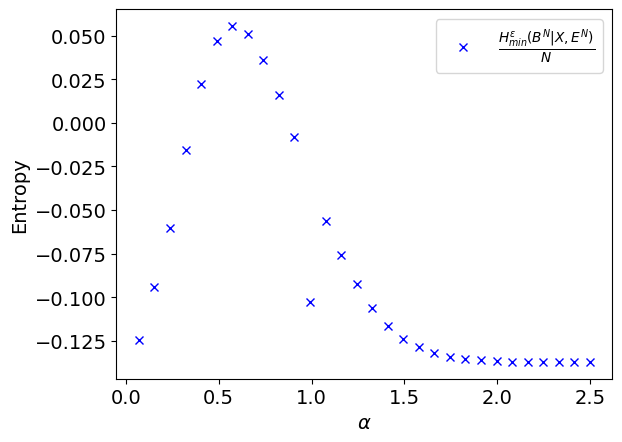

In [20]:
plt.figure()
plt.plot(alphas, res['vals'], 'bx', label=r'$\frac{H_{min}^\epsilon(B^N|X,E^N)}{N}$')
plt.xlabel(r'$\alpha$', fontsize=14)
plt.ylabel(r'Entropy', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

In [16]:
alphas[res['vals'].index(max(res['vals']))]

np.float64(0.5727586206896553)

# Photon number

## Ideal

In [17]:
res = {'shannon': [], 'hmin': [], 'deltas': [], 'shannon2': [], 'hmin2': []}
alphas = np.linspace(0.07, 2.5, 30)

for alpha in alphas:
    delta, p = simulation.getProbas(alpha, 1, 0, '1')
    hmin = HminLowerb.getHmin(p, delta, 7/8)
    shannon = shannonLower.runOpti(delta, p, 7/8)
    hmin2 = HminLowerb.getHmin(p, delta, 1/2)
    shannon2 = shannonLower.runOpti(delta, p, 1/2)
    res['shannon'].append(shannon)
    res['hmin'].append(hmin)
    res['shannon2'].append(shannon2)
    res['hmin2'].append(hmin2)
    res['deltas'].append(delta)

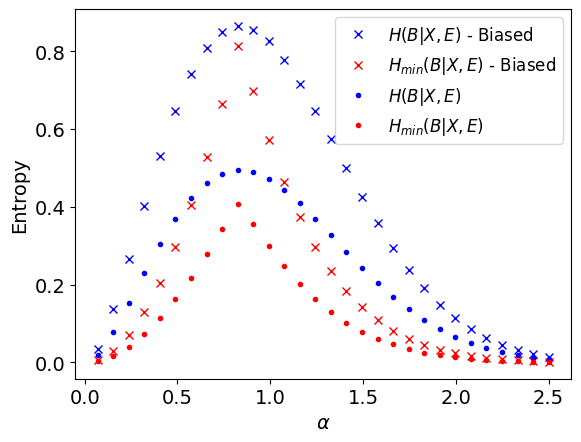

In [18]:
plt.figure()
plt.plot(alphas, res['shannon'], 'bx', label=r'$H(B|X,E)$ - Biased')
plt.plot(alphas, res['hmin'], 'rx', label=r'$H_{min}(B|X,E)$ - Biased')
plt.plot(alphas, res['shannon2'], 'b.', label=r'$H(B|X,E)$')
plt.plot(alphas, res['hmin2'], 'r.', label=r'$H_{min}(B|X,E)$')
plt.xlabel(r'$\alpha$', fontsize=14)
plt.ylabel(r'Entropy', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)

In [19]:
alphas[res['shannon'].index(max(res['shannon']))]

np.float64(0.8241379310344827)

## Bad detector

In [20]:
res = {'shannon': [], 'hmin': [], 'deltas': [], 'shannon2': [], 'hmin2': []}
alphas = np.linspace(0.07, 2.5, 30)

for alpha in alphas:
    delta, p = simulation.getProbas(alpha, 0.7, 1e-6, '1', True)
    hmin = HminLowerb.getHmin(p, delta, 7/8)
    shannon = shannonLower.runOpti(delta, p, 7/8)
    hmin2 = HminLowerb.getHmin(p, delta, 1/2)
    shannon2 = shannonLower.runOpti(delta, p, 1/2)
    res['shannon'].append(shannon)
    res['hmin'].append(hmin)
    res['shannon2'].append(shannon2)
    res['hmin2'].append(hmin2)
    res['deltas'].append(delta)

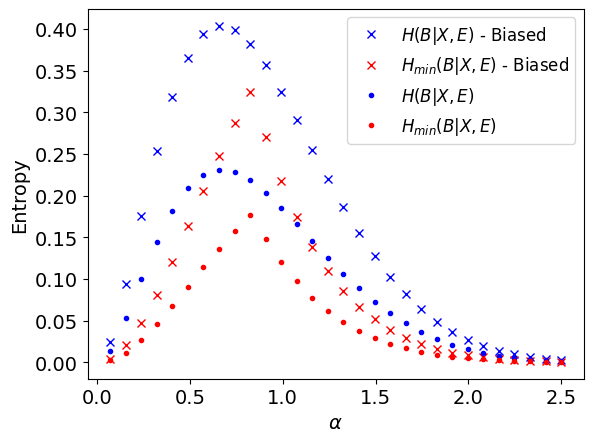

In [21]:
plt.figure()
plt.plot(alphas, res['shannon'], 'bx', label=r'$H(B|X,E)$ - Biased')
plt.plot(alphas, res['hmin'], 'rx', label=r'$H_{min}(B|X,E)$ - Biased')
plt.plot(alphas, res['shannon2'], 'b.', label=r'$H(B|X,E)$')
plt.plot(alphas, res['hmin2'], 'r.', label=r'$H_{min}(B|X,E)$')
plt.xlabel(r'$\alpha$', fontsize=14)
plt.ylabel(r'Entropy', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)

In [22]:
alphas[res['shannon'].index(max(res['shannon']))]

np.float64(0.6565517241379311)

## Bad detector and source

In [23]:
res = {'shannon': [], 'hmin': [], 'deltas': [], 'shannon2': [], 'hmin2': []}
alphas = np.linspace(0.07, 2.5, 30)

for alpha in alphas:
    amax, delta, p = simulation.doSimul(alpha, 7/8, '1', 100000, 0.7, True, True)
    hmin = HminLowerb.getHmin(p[0], delta, 7/8)
    shannon = shannonLower.runOpti(delta, p[0], 7/8)
    amax, delta, p = simulation.doSimul(alpha, 1/2, '1', 100000, 0.7, True, True)
    hmin2 = HminLowerb.getHmin(p[0], delta, 1/2)
    shannon2 = shannonLower.runOpti(delta, p[0], 1/2)
    res['shannon'].append(shannon)
    res['hmin'].append(hmin)
    res['shannon2'].append(shannon2)
    res['hmin2'].append(hmin2)
    res['deltas'].append(delta)

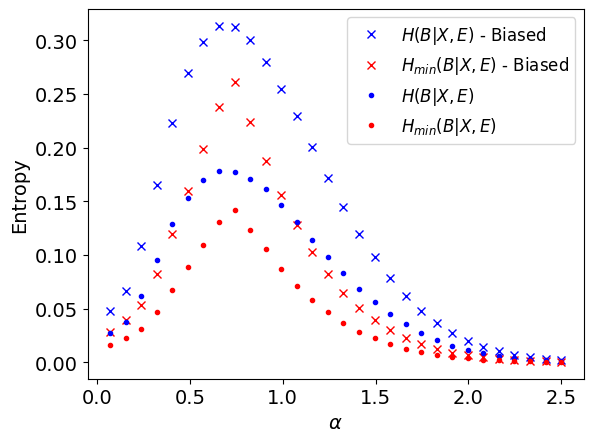

In [24]:
plt.figure()
plt.plot(alphas, res['shannon'], 'bx', label=r'$H(B|X,E)$ - Biased')
plt.plot(alphas, res['hmin'], 'rx', label=r'$H_{min}(B|X,E)$ - Biased')
plt.plot(alphas, res['shannon2'], 'b.', label=r'$H(B|X,E)$')
plt.plot(alphas, res['hmin2'], 'r.', label=r'$H_{min}(B|X,E)$')
plt.xlabel(r'$\alpha$', fontsize=14)
plt.ylabel(r'Entropy', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)

In [25]:
alphas[res['shannon'].index(max(res['shannon']))]

np.float64(0.6565517241379311)

## Blocksize study

In [16]:
alpha = 0.740344827586207
npoints = np.linspace(3, 7, 10)

amax, delta, p = simulation.doSimul(alpha, 7/8, '1', 100000, 0.7, True, True)
H_theo, lambdas, Rs, cm = shannonLower.getHDual(delta, p[0], 1/2)

In [17]:
vals = []
for npoint in npoints:
    ps = []
    delta = 0.0
    for i in range(5):
        amax, delta, p = simulation.doSimul(alpha, 7/8, '1', int(10**(npoint)), 0.7, True, True)
        ps.append(p[0])
    val3 = ShannonEAT.getH3(ps, int(10**npoint), lambdas, Rs, cm)
    vals.append(val3)
    

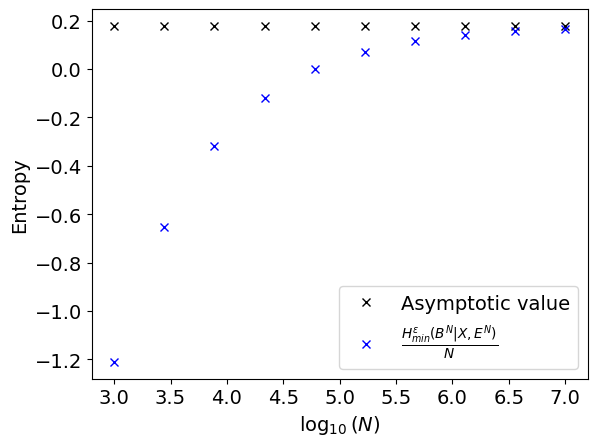

In [18]:
plt.figure()
Hts = [H_theo]*10
plt.plot(npoints, Hts, 'kx', label=r'Asymptotic value')
plt.plot(npoints, vals, 'bx', label=r'$\frac{H_{min}^\epsilon(B^N|X,E^N)}{N}$')
plt.xlabel(r"$\log_{10}(N)$", fontsize=14)
plt.ylabel(r"Entropy", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

## Bad detector, source + finite size

In [ ]:
res = {'alpha': [], 'vals': [], 'vals2': []}
alphas = np.linspace(0.07, 2.5, 30)

for alpha in alphas:
    ps = []
    ps2 = []
    amax, delta, p = simulation.doSimul(alpha, 7/8, '1', 100000, 0.7, True, True)
    amax, delta2, p2 = simulation.doSimul(alpha, 1/2, '1', 100000, 0.7, True, True)
    H_theo, lambdas, Rs, cm = shannonLower.getHDual(delta, p[0], 7/8)
    H_theo2, lambdas2, Rs2, cm2 = shannonLower.getHDual(delta2, p2[0], 1/2)
    for i in range(5):
        amax, delta, p = simulation.doSimul(alpha, 7/8, '1', 100000, 0.7, True, True)
        amax, delta2, p2 = simulation.doSimul(alpha, 1/2, '1', 100000, 0.7, True, True)
        ps.append(p[0])
        ps2.append(p2[0])
    val = ShannonEAT.getH3(ps, 100000, lambdas, Rs, cm)
    val2 = ShannonEAT.getH3(ps2, 100000, lambdas2, Rs2, cm2)
    res['vals'].append(val)
    res['vals2'].append(val2)
    res['alpha'].append(alpha)

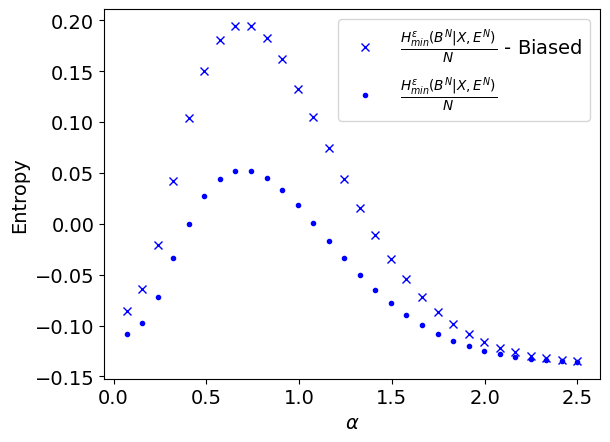

In [30]:
plt.figure()
plt.plot(alphas, res['vals'], 'bx', label=r'$\frac{H_{min}^\epsilon(B^N|X,E^N)}{N}$ - Biased')
plt.plot(alphas, res['vals2'], 'b.', label=r'$\frac{H_{min}^\epsilon(B^N|X,E^N)}{N}$')
plt.xlabel(r'$\alpha$', fontsize=14)
plt.ylabel(r'Entropy', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

In [31]:
alphas[res['vals'].index(max(res['vals']))]

np.float64(0.740344827586207)

## Real data

In [32]:
alpha = 0.58
npoints = np.linspace(3, 7, 10)

delta, p = simulation.getProbas(alpha, 0.25, 1/100, '1', True)
H_theo, lambdas, Rs, cm = shannonLower.getHDual(delta, p, 1/2)

In [ ]:
vals = []
for npoint in npoints:
    ps = []
    delta = 0.0
    for i in range(5):
        delta, p = simulation.doSimul(alpha, 1/2, '1', int(10**npoint), 0.25, True)
        ps.append(p[0])
    val3 = ShannonEAT.getH3(ps, int(10**npoint), lambdas, Rs, cm)
    vals.append(val3)
    

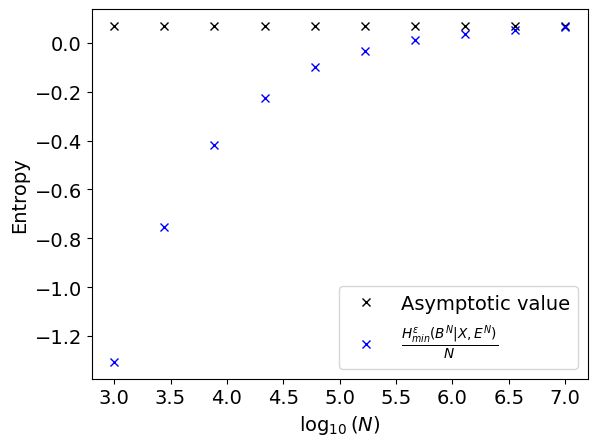

In [34]:
plt.figure()
Hts = [H_theo]*10
plt.plot(npoints, Hts, 'kx', label=r'Asymptotic value')
plt.plot(npoints, vals, 'bx', label=r'$\frac{H_{min}^\epsilon(B^N|X,E^N)}{N}$')
plt.xlabel(r"$\log_{10}(N)$", fontsize=14)
plt.ylabel(r"Entropy", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

# BPSK without inconclusive

## Ideal

In [78]:
res = {'shannon': [], 'hmin': [], 'deltas': []}
alphas = np.linspace(0, 2, 30)

for alpha in alphas:
    delta, p = simulation.getProbas(alpha, 1, 0, '4', False)
    hmin = HminLowerb.getHmin(p, delta, 1/2)
    shannon = shannonLower.runOpti(delta, p, 1/2)
    res['shannon'].append(shannon)
    res['hmin'].append(hmin)
    res['deltas'].append(delta)

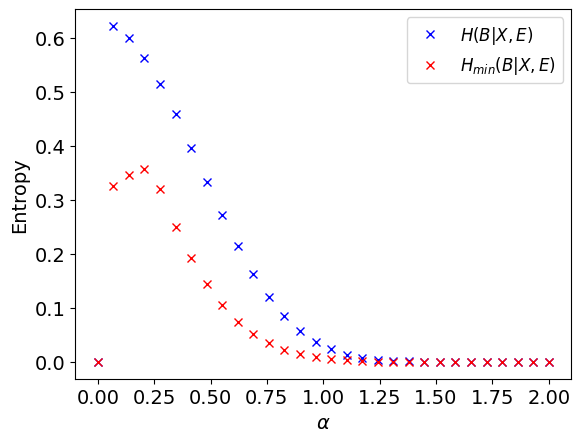

In [79]:
plt.figure()
plt.plot(alphas, res['shannon'], 'bx', label=r'$H(B|X,E)$')
plt.plot(alphas, res['hmin'], 'rx', label=r'$H_{min}(B|X,E)$')
plt.xlabel(r'$\alpha$', fontsize=14)
plt.ylabel(r'Entropy', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)

## Bad alpha

In [2]:
res = {'shannon': [], 'hmin': [], 'deltas': []}
alphas = np.linspace(0, 2, 30)

for alpha in alphas:
    amax, delta, p = simulation.doSimul(alpha, 1/2, '4', 100000, 1, False, True)
    hmin = HminLowerb.getHmin(p[0], delta, 1/2)
    shannon = shannonLower.runOpti(delta, p[0], 1/2)
    res['shannon'].append(shannon)
    res['hmin'].append(hmin)
    res['deltas'].append(delta)

/Users/thomasbrunet/Desktop/MASTERTHESIS/SDPLearning/HminLowerb.py:67: RuntimeWarning: invalid value encountered in log2
  return -np.log2(prob.value)


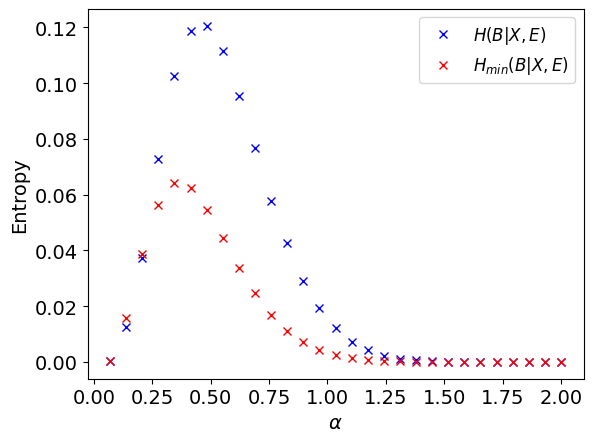

In [3]:
plt.figure()
plt.plot(alphas, res['shannon'], 'bx', label=r'$H(B|X,E)$')
plt.plot(alphas, res['hmin'], 'rx', label=r'$H_{min}(B|X,E)$')
plt.xlabel(r'$\alpha$', fontsize=14)
plt.ylabel(r'Entropy', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)

In [4]:
alphas[res['shannon'].index(max(res['shannon']))]

np.float64(0.0)

## Blocksize

In [63]:
alpha = alphas[res['shannon'].index(max(res['shannon']))]
npoints = np.linspace(3, 7, 10)

amax, delta, p = simulation.doSimul(alpha, 1/2, '4', 1000000, 1, False, True)
H_theo, lambdas, Rs, cm = shannonLower.getHDual(delta, p[0], 1/2)

In [41]:
vals = []
for npoint in npoints:
    ps = []
    delta = 0.0
    for i in range(5):
        amax, delta, p = simulation.doSimul(alpha, 1/2, '4', int(10**(npoint)), 1, False, True)
        ps.append(p[0])
    val3 = ShannonEAT.getH3(ps, int(10**npoint), lambdas, Rs, cm)
    vals.append(val3)

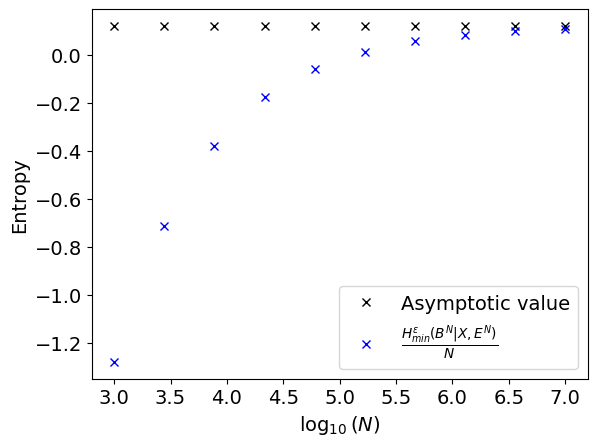

In [42]:
plt.figure()
Hts = [H_theo]*10
plt.plot(npoints, Hts, 'kx', label=r'Asymptotic value')
plt.plot(npoints, vals, 'bx', label=r'$\frac{H_{min}^\epsilon(B^N|X,E^N)}{N}$')
plt.xlabel(r"$\log_{10}(N)$", fontsize=14)
plt.ylabel(r"Entropy", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

## Bad alpha + finite size

In [6]:
res = {'alpha': [], 'vals': [], }
alphas = np.linspace(0.01, 2, 30)

for alpha in alphas:
    ps = []
    delta = 0.0
    amax, delta, p = simulation.doSimul(alpha, 1/2, '4', 100000, 1, False, True)
    H_theo, lambdas, Rs, cm = shannonLower.getHDual(delta, p[0], 1/2)
    for i in range(5):
        amax, delta, p = simulation.doSimul(alpha, 1/2, '4', 100000, 1, False, True)
        ps.append(p[0])
    val = ShannonEAT.getH3(ps, 100000, lambdas, Rs, cm, 2)
    res['vals'].append(val)
    res['alpha'].append(alpha)

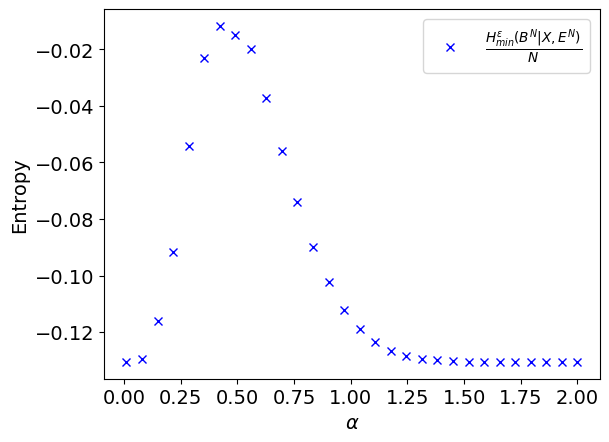

In [7]:
plt.figure()
plt.plot(alphas, res['vals'], 'bx', label=r'$\frac{H_{min}^\epsilon(B^N|X,E^N)}{N}$')
plt.xlabel(r'$\alpha$', fontsize=14)
plt.ylabel(r'Entropy', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

# BPSK with inconclusive

## Ideal

In [8]:
res = {'shannon': [], 'shannon2': [], 'hmin': [], 'deltas': []}
alphas = np.linspace(0, 2, 30)

for alpha in alphas:
    delta, p = simulation.getProbas(alpha, 1, 0, '5', False, np.sqrt(2)*alpha)
    hmin = HminLowerb.getHmin(p, delta, 1/2)
    shannon = shannonLower.runOpti(delta, p, 1/2)
    shannon2 = shannonLower.runOpti(delta, p, 1/2, 2)
    res['shannon'].append(shannon)
    res['shannon2'].append(shannon2)
    res['hmin'].append(hmin)
    res['deltas'].append(delta)

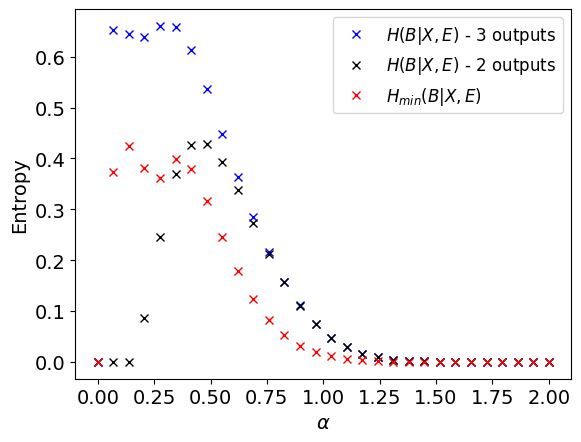

In [9]:
plt.figure()
plt.plot(alphas, res['shannon'], 'bx', label=r'$H(B|X,E)$ - 3 outputs')
plt.plot(alphas, res['shannon2'], 'kx', label=r'$H(B|X,E)$ - 2 outputs')
plt.plot(alphas, res['hmin'], 'rx', label=r'$H_{min}(B|X,E)$')
plt.xlabel(r'$\alpha$', fontsize=14)
plt.ylabel(r'Entropy', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)

In [10]:
alphas[res['shannon'].index(max(res['shannon']))], alphas[res['shannon2'].index(max(res['shannon2']))]

(np.float64(0.27586206896551724), np.float64(0.48275862068965514))

## Bad alpha

In [11]:
res = {'shannon': [], 'shannon2': [], 'hmin': [], 'deltas': []}
alphas = np.linspace(0.01, 2, 30)

for alpha in alphas:
    amax, delta, p = simulation.doSimul(alpha, 1/2, '5', 100000, 1, False, True, np.sqrt(2)*alpha)
    hmin = HminLowerb.getHmin(p[0], delta, 1/2)
    shannon = shannonLower.runOpti(delta, p[0], 1/2)
    shannon2 = shannonLower.runOpti(delta, p[0], 1/2, 2)
    res['shannon'].append(shannon)
    res['shannon2'].append(shannon2)
    res['hmin'].append(hmin)
    res['deltas'].append(delta)

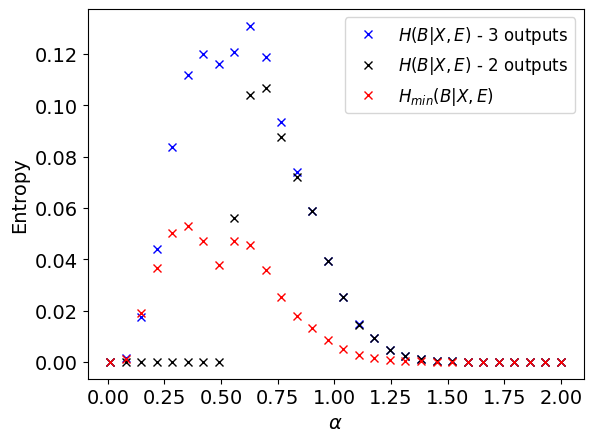

In [12]:
plt.figure()
plt.plot(alphas, res['shannon'], 'bx', label=r'$H(B|X,E)$ - 3 outputs')
plt.plot(alphas, res['shannon2'], 'kx', label=r'$H(B|X,E)$ - 2 outputs')
plt.plot(alphas, res['hmin'], 'rx', label=r'$H_{min}(B|X,E)$')
plt.xlabel(r'$\alpha$', fontsize=14)
plt.ylabel(r'Entropy', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)

In [13]:
alphas[res['shannon'].index(max(res['shannon']))], alphas[res['shannon2'].index(max(res['shannon2']))]

(np.float64(0.6275862068965518), np.float64(0.6962068965517242))

## Blocksize

In [51]:
alpha = alphas[res['shannon'].index(max(res['shannon']))]
npoints = np.linspace(3, 7, 10)

amax, delta, p = simulation.doSimul(alpha, 1/2, '5', 1000000, 1, False, True, np.sqrt(2)*alpha)
H_theo, lambdas, Rs, cm = shannonLower.getHDual(delta, p[0], 1/2)

In [52]:
vals = []
for npoint in npoints:
    ps = []
    delta = 0.0
    for i in range(5):
        amax, delta, p = simulation.doSimul(alpha, 1/2, '5', int(10**(npoint)), 1, False, True, np.sqrt(2)*alpha)
        ps.append(p[0])
    val3 = ShannonEAT.getH3(ps, int(10**npoint), lambdas, Rs, cm)
    vals.append(val3)

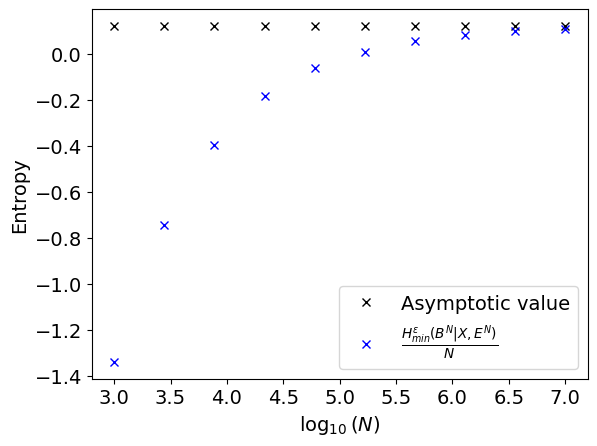

In [53]:
plt.figure()
Hts = [H_theo]*10
plt.plot(npoints, Hts, 'kx', label=r'Asymptotic value')
plt.plot(npoints, vals, 'bx', label=r'$\frac{H_{min}^\epsilon(B^N|X,E^N)}{N}$')
plt.xlabel(r"$\log_{10}(N)$", fontsize=14)
plt.ylabel(r"Entropy", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

## Bad alpha + finite size

In [14]:
res = {'alpha': [], 'vals': [], }
alphas = np.linspace(0.01, 2, 30)

for alpha in alphas:
    ps = []
    delta = 0.0
    amax, delta, p = simulation.doSimul(alpha, 1/2, '5', 100000, 0.7, False, True, np.sqrt(2)*alpha)
    H_theo, lambdas, Rs, cm = shannonLower.getHDual(delta, p[0], 1/2)
    for i in range(5):
        amax, delta, p = simulation.doSimul(alpha, 1/2, '5', 100000, 0.77, False, True, np.sqrt(2)*alpha)
        ps.append(p[0])
    val = ShannonEAT.getH3(ps, 100000, lambdas, Rs, cm)
    res['vals'].append(val)
    res['alpha'].append(alpha)

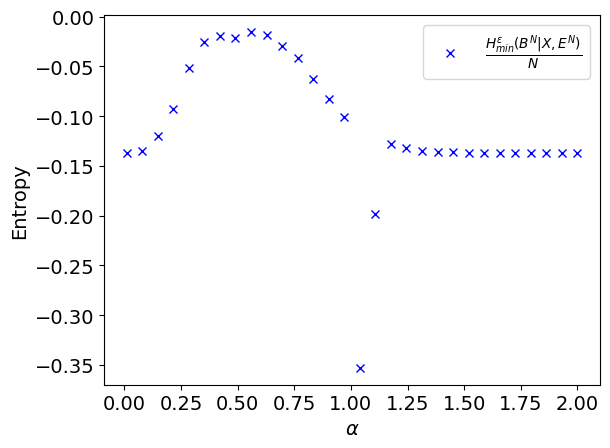

In [15]:
plt.figure()
plt.plot(alphas, res['vals'], 'bx', label=r'$\frac{H_{min}^\epsilon(B^N|X,E^N)}{N}$')
plt.xlabel(r'$\alpha$', fontsize=14)
plt.ylabel(r'Entropy', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

## Choosing d for BPSK with inconclusive

In [ ]:
deltas = np.linspace(0,2,30)
res = {'shannon': [], 'hmin': [], 'deltas': []}

for d in deltas:
    alpha = 0.4
    delta, p = simulation.getProbas(alpha, 1, 0, '5', False, d)
    hmin = HminLowerb.getHmin(p, delta, 1/2)
    shannon = shannonLower.runOpti(delta, p, 1/2)
    res['shannon'].append(shannon)
    res['hmin'].append(hmin)
    res['deltas'].append(delta)
    

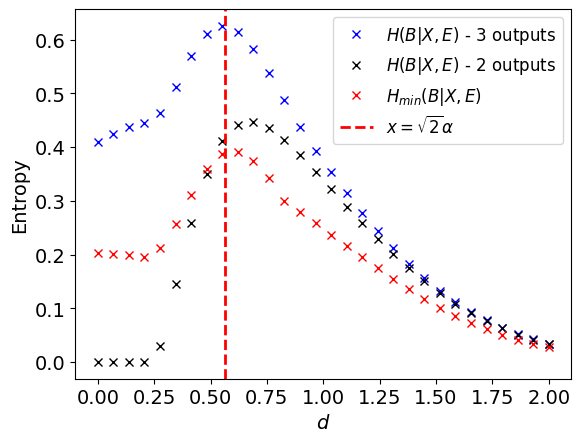

In [ ]:
plt.figure()
plt.plot(deltas, res['shannon'], 'bx', label=r'$H(B|X,E)$ - 3 outputs')
plt.plot(deltas, res['hmin'], 'rx', label=r'$H_{min}(B|X,E)$')
plt.axvline(x=np.sqrt(2)*alpha, color='red', linestyle='--', linewidth=2, label=r'$x=\sqrt{2}\alpha$')
plt.xlabel(r'$d$', fontsize=14)
plt.ylabel(r'Entropy', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)

In [24]:
import GraamBFF

# Quantum Eve without y

In [26]:
alphas = np.linspace(0,2,10) ### Z depends on y
Hs = []
for alpha in alphas:
    delta, p = simulation.getProbas(alpha, 1, 0, '1') 
    Hs.append(GraamBFF.runSDP(p, delta, 1/2))

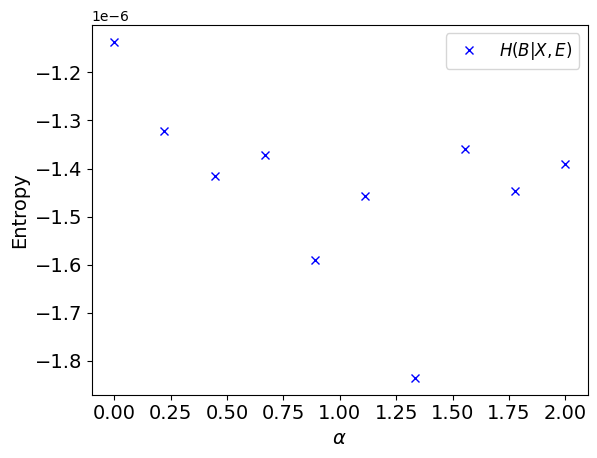

In [27]:
plt.figure()
plt.plot(alphas, Hs, 'bx', label=r'$H(B|X,E)$')
plt.xlabel(r'$\alpha$', fontsize=14)
plt.ylabel(r'Entropy', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)

In [2]:
import GraamBFF4

# Quantum Eve with y

In [4]:
alphas = np.linspace(0,2,20) ### Z depends on y
Hs = []
for alpha in alphas:
    delta = np.exp(-np.abs(alpha)**2 / 2)

    p = {0: {0: {0: 1, 1: 1-delta**2}, 1: {0: delta**2, 1: 0}}, 1: {0: {0: 0, 1: delta**2}, 1: {0: 1-delta**2, 1: 1}}}  
    Hs.append(GraamBFF4.runSDP(p, delta, 1/2))

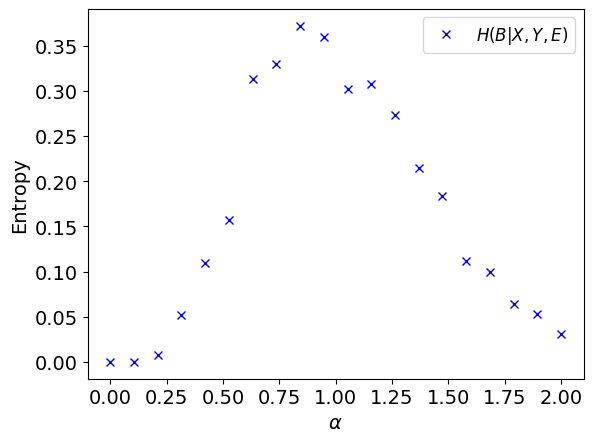

In [5]:
plt.figure()
plt.plot(alphas, Hs, 'bx', label=r'$H(B|X,Y,E)$')
plt.xlabel(r'$\alpha$', fontsize=14)
plt.ylabel(r'Entropy', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)

In [8]:
alphas = np.linspace(0,2,20) ### Z depends on y
Hs = []
eff=0.7
dc=1e-6
for alpha in alphas:
    delta = np.exp(-np.abs(alpha)**2 * eff / 2)

    p = {0: {0: {0: 1, 1: 1-delta**2}, 1: {0: delta**2, 1: 0}}, 1: {0: {0: 0, 1: delta**2}, 1: {0: 1-delta**2, 1: 1}}}  
    Hs.append(GraamBFF4.runSDP(p,  np.exp(-np.abs(alpha)**2 / 2), 1/2))

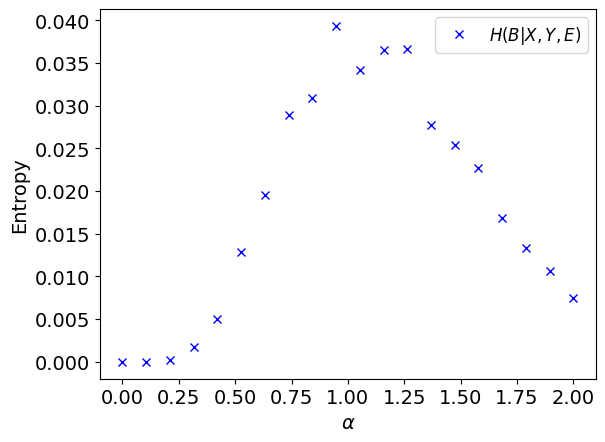

In [9]:
plt.figure()
plt.plot(alphas, Hs, 'bx', label=r'$H(B|X,Y,E)$')
plt.xlabel(r'$\alpha$', fontsize=14)
plt.ylabel(r'Entropy', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)

In [4]:
alphas = np.linspace(0,2,10) ### Z depends on y
Hs = []
eff=0.2
for alpha in alphas:
    delta = np.exp(-np.abs(alpha)**2 * eff / 2)

    p = {0: {0: {0: 1, 1: 1-delta**2}, 1: {0: delta**2, 1: 0}}, 1: {0: {0: 0, 1: delta**2}, 1: {0: 1-delta**2, 1: 1}}}  
    Hs.append(GraamBFF4.runSDP(p, np.exp(-np.abs(alpha)**2 / 2), 1/2))

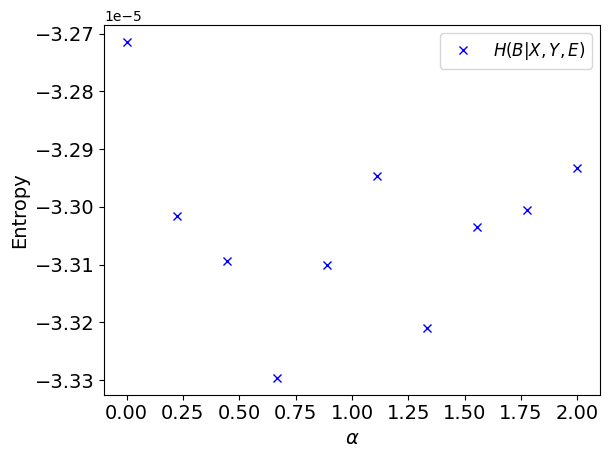

In [5]:
plt.figure()
plt.plot(alphas, Hs, 'bx', label=r'$H(B|X,Y,E)$')
plt.xlabel(r'$\alpha$', fontsize=14)
plt.ylabel(r'Entropy', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)